In [1]:
def data_preprocessing():
    import pandas as pd
    from sklearn.model_selection import train_test_split
    
    red = pd.read_csv('dataset/winequality-red.csv', sep=';')
    white = pd.read_csv('dataset/winequality-white.csv', sep=';')
    
    red['red'] = 1
    white['red'] = 0
    data = pd.concat([red, white], ignore_index=True)

    X = data[data.columns[:-1]]
    y = data['red']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X, y, X_train, X_test, y_train, y_test

In [15]:
def model_estimate(test, pred):
    from matplotlib import pyplot as plt
    from sklearn.metrics import confusion_matrix
    result = confusion_matrix(test, pred)

    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(result, interpolation='nearest', cmap=plt.cm.Blues, alpha=0.8)
    fig.colorbar(cax)
    ax.grid(False)

    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted White', 'Predicted Red'))
    plt.xticks(fontsize=16)

    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual White', 'Actual Red'))
    plt.yticks(fontsize=16)

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            ax.text(x=j, y=i, s=result[i, j], va='center', ha='center', size=20)

## Utility Functions

In [24]:
def preprocess(split=True):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    
    red = pd.read_csv('dataset/winequality-red.csv', sep=';')
    white = pd.read_csv('dataset/winequality-white.csv', sep=';')
    
    red['red'] = 1
    white['red'] = 0
    data = pd.concat([red, white], ignore_index=True)

    X = data[data.columns[:-1]]
    y = data['red']
    if not split:
        return X, y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [27]:
def estimate(model, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    
    fig, ax = plt.subplots(dpi=100.0)
    ax.grid(False)
    plot_confusion_matrix(model, X_test, y_test,
                          display_labels=('White', 'Red'),
                          cmap=plt.cm.Blues,
                          normalize=None,
                          ax=ax,)
    plt.show()
    
    fig, ax = plt.subplots(dpi=100.0)
    ax.grid(False)
    plot_confusion_matrix(model, X_test, y_test,
                          display_labels=('White', 'Red'),
                          cmap=plt.cm.Blues,
                          normalize='all',
                          ax=ax,)
    plt.show()

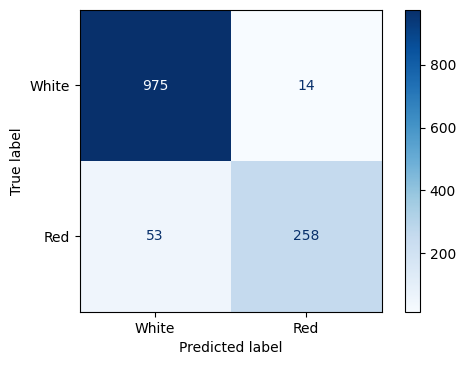

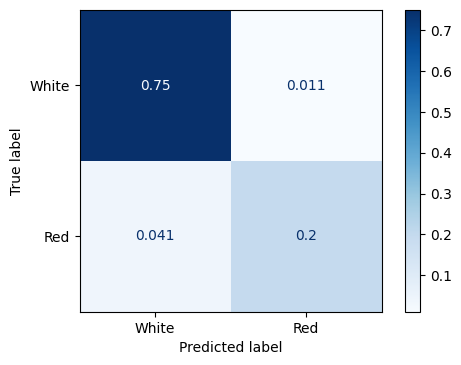

0.9484615384615385


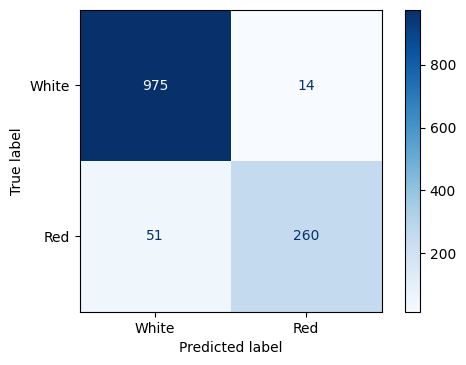

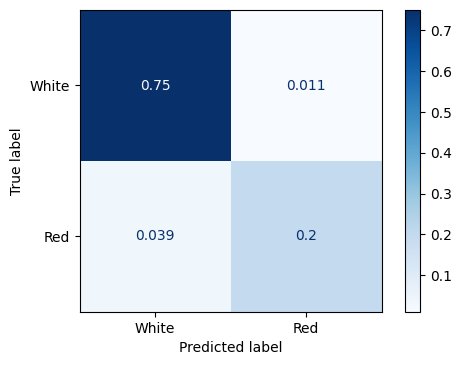

0.95


In [31]:
def knn():
    X_train, X_test, y_train, y_test = preprocess()
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    model = KNeighborsClassifier(n_neighbors=2)
    model.fit(X_train, y_train)
    estimate(model, X_test, y_test)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(acc)

    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(X_train, y_train)
    estimate(model, X_test, y_test)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(acc)

knn()

In [ ]:
def model_estimate():
    from sklearn.metrics import plot_confusion_matrix

    titles_options = [("Confusion matrix without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


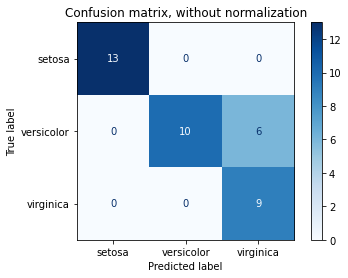

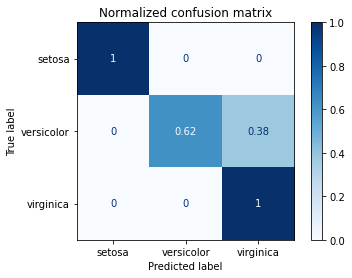

In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()